## 1.数据加载

In [1]:
item_path = "../data/fresh_comp_offline/tianchi_fresh_comp_train_item.csv"
user_path = "../data/fresh_comp_offline/tianchi_fresh_comp_train_user.csv"

In [2]:
# # 数据加载时间测试
# import os
# import sys
# import timeit
# import pandas as pd

# start_time = timeit.default_timer()

# # data loading using pandas
# with open(user_path, mode = 'r') as data_file:
#     df = pd.read_csv(data_file)
    
# end_time = timeit.default_timer()

# print(('The code for file ' + os.path.split(__file__)[1] +
#        ' ran for %.2fs' % ((end_time - start_time))), file = sys.stderr)

In [3]:
import os
import sys
import timeit
import pandas as pd

'''
data loading and preview
'''
start_time = timeit.default_timer()

# data loading using pandas
# show data sketch
with open(user_path, 'r') as data_file_user:
    chunks_user = pd.read_csv(data_file_user, iterator = True)
with open(item_path, mode = 'r') as data_file_item:
    chunks_item = pd.read_csv(data_file_item, iterator = True) 
chunk_user = chunks_user.get_chunk(5)
chunk_item = chunks_item.get_chunk(5)
print(chunk_user)
print(chunk_item)
    
end_time = timeit.default_timer()

print(('The code for file ' + os.path.split(item_path)[1] + '/' + os.path.split(user_path)[1] +
       ' ran for %.2fs' % ((end_time - start_time))), file = sys.stderr)

    user_id    item_id  behavior_type user_geohash  item_category  \
0  10001082  285259775              1      97lk14c           4076   
1  10001082    4368907              1          NaN           5503   
2  10001082    4368907              1          NaN           5503   
3  10001082   53616768              1          NaN           9762   
4  10001082  151466952              1          NaN           5232   

            time  
0  2014-12-08 18  
1  2014-12-12 12  
2  2014-12-12 12  
3  2014-12-02 15  
4  2014-12-12 11  
     item_id  item_geohash  item_category
0  100002303           NaN           3368
1  100003592           NaN           7995
2  100006838           NaN          12630
3  100008089           NaN           7791
4  100012750           NaN           9614


The code for file tianchi_fresh_comp_train_item.csv/tianchi_fresh_comp_train_user.csv ran for 0.01s


## 2.数据分析

#### 2.1 平均购买率

In [4]:
'''
data pre_analysis
'''

################################
# calculation of 'CVR'
################################

count_all = 0
count_4 = 0  # the count of behavior_type = 4
for df in pd.read_csv(open(user_path, 'r'), 
                      chunksize = 100000): 
    try:
        count_user = df['behavior_type'].value_counts()
        count_all += count_user[1]+count_user[2]+count_user[3]+count_user[4]
        count_4 += count_user[4]
    except StopIteration:
        print("Iteration is stopped.")
        break
# CVR
cvr = count_4 / count_all
print(cvr)


0.009985776926023916


#### 2.2 每日数据可视化

C:\Users\kang\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':


chunk 1 done.
chunk 2 done.
chunk 3 done.
chunk 4 done.
chunk 5 done.
chunk 6 done.
chunk 7 done.
chunk 8 done.
chunk 9 done.
chunk 10 done.
chunk 11 done.
chunk 12 done.
chunk 13 done.
chunk 14 done.
chunk 15 done.
chunk 16 done.
chunk 17 done.
chunk 18 done.
chunk 19 done.
chunk 20 done.
chunk 21 done.
chunk 22 done.
chunk 23 done.
chunk 24 done.
chunk 25 done.
chunk 26 done.
chunk 27 done.
chunk 28 done.
chunk 29 done.
chunk 30 done.
chunk 31 done.
chunk 32 done.
chunk 33 done.
chunk 34 done.
chunk 35 done.
chunk 36 done.
chunk 37 done.
chunk 38 done.
chunk 39 done.
chunk 40 done.
chunk 41 done.
chunk 42 done.
chunk 43 done.
chunk 44 done.
chunk 45 done.
chunk 46 done.
chunk 47 done.
chunk 48 done.
chunk 49 done.
chunk 50 done.
chunk 51 done.
chunk 52 done.
chunk 53 done.
chunk 54 done.
chunk 55 done.
chunk 56 done.
chunk 57 done.
chunk 58 done.
chunk 59 done.
chunk 60 done.
chunk 61 done.
chunk 62 done.
chunk 63 done.
chunk 64 done.
chunk 65 done.
chunk 66 done.
chunk 67 done.
chun

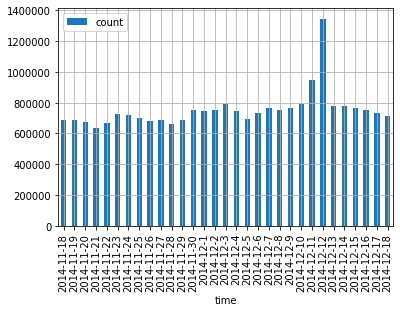

In [5]:
################################
# visualization month record based on date(11-18->12-18)
################################

count_day = {}  # using dictionary for date-count pairs
for i in range(31): # for speed up the program, initial dictionary here
    if i <= 12: date = '2014-11-%d' % (i+18)
    else: date = '2014-12-%d' % (i-12)
    count_day[date] = 0
    
batch = 0
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H')
for df in pd.read_csv(open(user_path, 'r'), 
                      parse_dates=['time'], index_col=['time'], date_parser=dateparse,
                      chunksize = 100000): 
    try:
        for i in range(31):
            if i <= 12: date = '2014-11-%d' % (i+18)
            else: date = '2014-12-%d' % (i-12)
            count_day[date] += df[date].shape[0]
        batch += 1
        print('chunk %d done.' %batch ) 
        
    except StopIteration:
        print("finish data process")
        break

from dict_csv import *
row_dict2csv(count_day, "../data/count_day.csv" )

df_count_day = pd.read_csv(open("../data/count_day.csv",'r'), 
                           header = None,
                           names = ['time', 'count'])
import matplotlib.pyplot as plt

# x_day = df_count_day.index.get_values()
df_count_day = df_count_day.set_index('time')
# x_date = df_count_day.index.get_values()
# y = df_count_day['count'].get_values()

df_count_day['count'].plot(kind='bar')
plt.legend(loc='best')
plt.grid(True)
plt.show()


#### 2.3 每小时数据分析

In [6]:
##################################################
# visualization based on hour(e.g. 12-17-18)
##################################################

count_hour_1217 = {}   # using dictionary for hour-count pairs 
count_hour_1218 = {}   # 4 types of behavior formed as {key: counts list of 1/2/3/4}
for i in range(24):    # to speed up the program, initial dictionaries here
    time_str17 = '2014-12-17 %02.d' % i
    time_str18 = '2014-12-18 %02.d' % i
    count_hour_1217[time_str17] = [0,0,0,0]
    count_hour_1218[time_str18] = [0,0,0,0]

batch = 0   # for process printing
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H')
for df in pd.read_csv(open(user_path, 'r'), 
                      parse_dates = ['time'], 
                      index_col = ['time'], 
                      date_parser = dateparse,
                      chunksize = 50000): 
    try:
        for i in range(24):
            time_str17 = '2014-12-17 %02.d' % i
            time_str18 = '2014-12-18 %02.d' % i
            tmp17 = df[time_str17]['behavior_type'].value_counts()
            tmp18 = df[time_str18]['behavior_type'].value_counts()
            for j in range(len(tmp17)):              
                count_hour_1217[time_str17][tmp17.index[j]-1] += tmp17[tmp17.index[j]]
            for j in range(len(tmp18)):    
                count_hour_1218[time_str18][tmp18.index[j]-1] += tmp18[tmp18.index[j]]                       
        batch += 1
        print('chunk %d done.' %batch ) 
        
    except StopIteration:
        print("finish data process")
        break

C:\Users\kang\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


chunk 1 done.
chunk 2 done.
chunk 3 done.
chunk 4 done.
chunk 5 done.
chunk 6 done.
chunk 7 done.
chunk 8 done.
chunk 9 done.
chunk 10 done.
chunk 11 done.
chunk 12 done.
chunk 13 done.
chunk 14 done.
chunk 15 done.
chunk 16 done.
chunk 17 done.
chunk 18 done.
chunk 19 done.
chunk 20 done.
chunk 21 done.
chunk 22 done.
chunk 23 done.
chunk 24 done.
chunk 25 done.
chunk 26 done.
chunk 27 done.
chunk 28 done.
chunk 29 done.
chunk 30 done.
chunk 31 done.
chunk 32 done.
chunk 33 done.
chunk 34 done.
chunk 35 done.
chunk 36 done.
chunk 37 done.
chunk 38 done.
chunk 39 done.
chunk 40 done.
chunk 41 done.
chunk 42 done.
chunk 43 done.
chunk 44 done.
chunk 45 done.
chunk 46 done.
chunk 47 done.
chunk 48 done.
chunk 49 done.
chunk 50 done.
chunk 51 done.
chunk 52 done.
chunk 53 done.
chunk 54 done.
chunk 55 done.
chunk 56 done.
chunk 57 done.
chunk 58 done.
chunk 59 done.
chunk 60 done.
chunk 61 done.
chunk 62 done.
chunk 63 done.
chunk 64 done.
chunk 65 done.
chunk 66 done.
chunk 67 done.
chun

<Figure size 432x288 with 0 Axes>

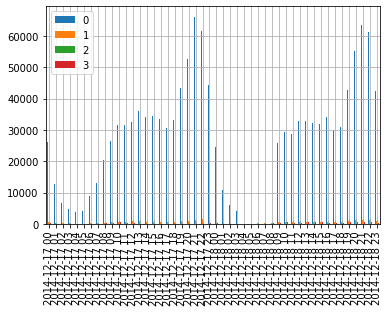

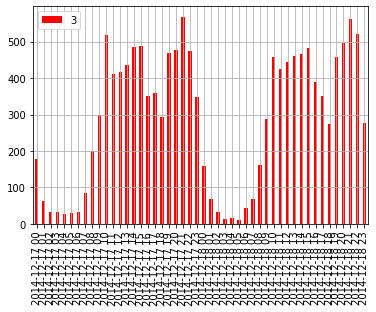

In [7]:
# storing the count result
df_1217 = pd.DataFrame.from_dict(count_hour_1217, orient='index')  # convert dict to dataframe
df_1218 = pd.DataFrame.from_dict(count_hour_1218, orient='index') 
df_1217.to_csv("../data/count_hour17.csv")                         # store as csv file
df_1218.to_csv("../data/count_hour18.csv")

df_1217 = pd.read_csv("../data/count_hour17.csv", index_col = 0)
df_1218 = pd.read_csv("../data/count_hour18.csv", index_col = 0)

# drawing figure
import matplotlib.pyplot as plt
df_1718 = pd.concat([df_1217,df_1218])

f1 = plt.figure(1)
df_1718.plot(kind='bar')
plt.legend(loc='best')
plt.grid(True)
plt.show()

f2 = plt.figure(2)
df_1718['3'].plot(kind='bar', color = 'r')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### 2.4 用户微观行为统计

In [8]:
##################################################
# user behavior analysis
##################################################

user_list = [10001082, 
             10496835, 
             107369933,
             108266048,
             10827687, 
             108461135, 
             110507614, 
             110939584, 
             111345634, 
             111699844]
user_count = {}
for i in range(10):
    user_count[user_list[i]] = [0,0,0,0]  # key-value value = count of 4 types of behaviors
 
batch = 0   # for process printing   
for df in pd.read_csv(open(user_path, 'r'), 
                      chunksize = 100000,
                      index_col = ['user_id']): 
    try:
        for i in range(10):
            tmp = df[df.index == user_list[i]]['behavior_type'].value_counts()
            for j in range(len(tmp)):      
                user_count[user_list[i]][tmp.index[j]-1] += tmp[tmp.index[j]]
        batch += 1
        print('chunk %d done.' %batch )   
             
    except StopIteration:
        print("Iteration is stopped.")
        break

# storing the count result
df_user_count = pd.DataFrame.from_dict(user_count, orient='index')  # convert dict to dataframe) 
df_user_count.to_csv("../data/user_count.csv")                   # store as csv file


chunk 1 done.
chunk 2 done.
chunk 3 done.
chunk 4 done.
chunk 5 done.
chunk 6 done.
chunk 7 done.
chunk 8 done.
chunk 9 done.
chunk 10 done.
chunk 11 done.
chunk 12 done.
chunk 13 done.
chunk 14 done.
chunk 15 done.
chunk 16 done.
chunk 17 done.
chunk 18 done.
chunk 19 done.
chunk 20 done.
chunk 21 done.
chunk 22 done.
chunk 23 done.
chunk 24 done.
chunk 25 done.
chunk 26 done.
chunk 27 done.
chunk 28 done.
chunk 29 done.
chunk 30 done.
chunk 31 done.
chunk 32 done.
chunk 33 done.
chunk 34 done.
chunk 35 done.
chunk 36 done.
chunk 37 done.
chunk 38 done.
chunk 39 done.
chunk 40 done.
chunk 41 done.
chunk 42 done.
chunk 43 done.
chunk 44 done.
chunk 45 done.
chunk 46 done.
chunk 47 done.
chunk 48 done.
chunk 49 done.
chunk 50 done.
chunk 51 done.
chunk 52 done.
chunk 53 done.
chunk 54 done.
chunk 55 done.
chunk 56 done.
chunk 57 done.
chunk 58 done.
chunk 59 done.
chunk 60 done.
chunk 61 done.
chunk 62 done.
chunk 63 done.
chunk 64 done.
chunk 65 done.
chunk 66 done.
chunk 67 done.
chun

In [9]:
print(df_user_count)

               0    1    2   3
10001082     207    0    0   4
10496835    1340    2   30   5
107369933    743    1   33   8
108266048   5421   42    3   1
10827687    2826   11  111  21
108461135  18023  439  244  24
110507614  11590  353  426  24
110939584    202    2    6   0
111345634   6505   45  260  81
111699844   2126   54   13   9


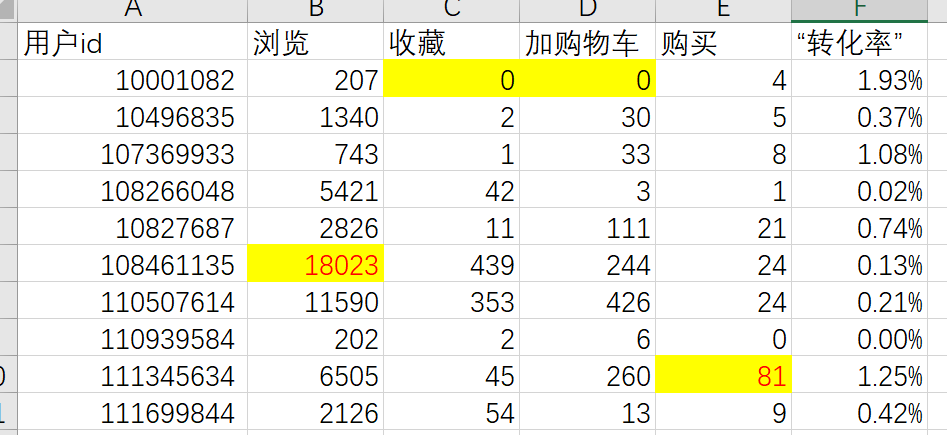

参考代码：https://github.com/PnYuan/Tianchi-BigData/tree/master/Mobile_Recommendation